In [ ]:
building and analyzing models to simulate and predict financial data using the
 S&P500 dataset.

1)a
A stationary time series has statistical properties such as mean and variance that are constant over time
There are several methods to test for stationarity in time series data. Here are some of the most commonly used ones:

Augmented Dickey-Fuller (ADF) Test: This test checks for a unit root in the time series. If the test statistic is less than the critical value, the series is stationary. The null hypothesis is that the time series has a unit root (is non-stationary)

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test: This test checks for the stationarity around a deterministic trend. The null hypothesis is that the time series is stationary.

Phillips-Perron (PP) Test: Similar to the ADF test, but it accounts for autocorrelation and heteroscedasticity in the error terms.

Visual Inspection: Plotting the time series and looking for trends or seasonality can give a quick indication of stationarity. A stationary time series will not exhibit any visible trends or seasonality1.

Summary Statistics: Splitting the time series into different partitions and comparing the mean and variance of each group can also help identify stationarity

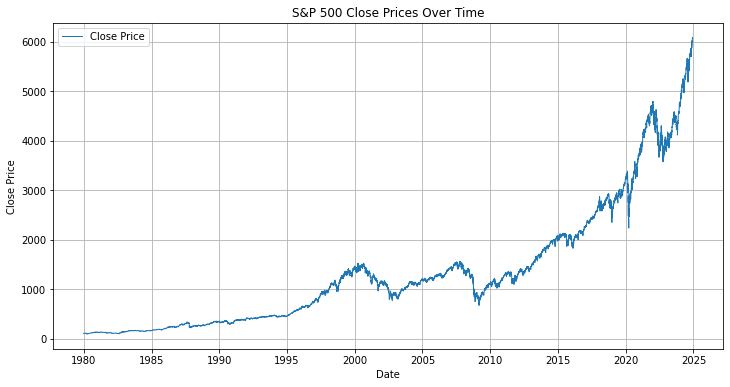

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download S&P500 data
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', linewidth=1)
plt.title('S&P 500 Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


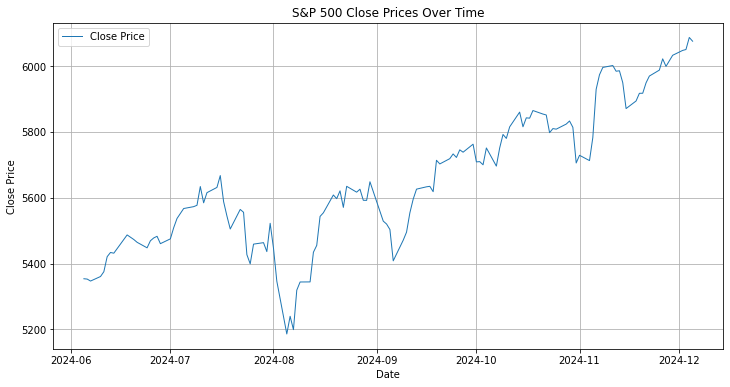

In [40]:
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
last_six_months = data[data['Date'] >= (data['Date'].max() - pd.DateOffset(months=6))]
plt.figure(figsize=(12, 6))
plt.plot(last_six_months['Date'], last_six_months['Close'], label='Close Price', linewidth=1)
plt.title('S&P 500 Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


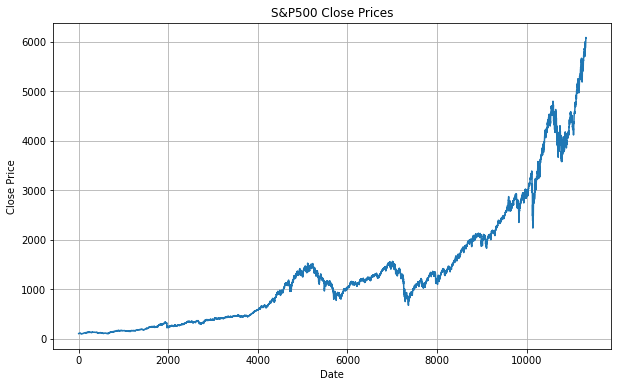

ADF Statistic: 4.1316587133039695
P-value: 1.0
The time series is non-stationary (fail to reject the null hypothesis).


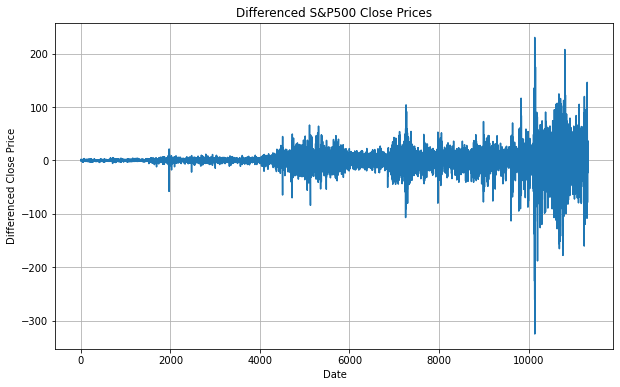

ADF Statistic: -18.201499827825202
P-value: 2.405215463929601e-30
The time series is stationary (reject the null hypothesis).


In [31]:
from statsmodels.tsa.stattools import adfuller 
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('S&P500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
adf_result = adfuller(data['Close'].dropna())
adf_statistic, p_value = adf_result[0], adf_result[1]
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05  
if p_value < alpha:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")


data['Close_diff'] = data['Close'].diff().dropna()
plt.figure(figsize=(10,6))
plt.plot(data['Close_diff'])
plt.title('Differenced S&P500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.grid(True)
plt.show()

adf_result = adfuller(data['Close_diff'].dropna())
adf_statistic, p_value = adf_result[0], adf_result[1]

print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05  
if p_value < alpha:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")


1)Question
Structural Breaks:

Issue: The ADF test assumes no structural breaks in the data, meaning it does not account for sudden changes in the underlying data-generating process.

Implication: Significant events, such as changes in economic policies or market dynamics, can lead to misleading results, potentially indicating non-stationarity when the issue is actually a structural break.

Lag Length Selection:

Issue: The choice of lag length can impact the test outcome. While software often auto-selects the lag length based on criteria such as the Akaike Information Criterion (AIC), it might not always be optimal for every dataset.

Implication: An incorrect lag length can result in inaccurate test results, either falsely indicating stationarity or non-stationarity.

Single Transformation:

Issue: First differencing might not fully address non-stationarity if there is strong seasonality or non-linear trends.

Implication: Further transformations, such as seasonal differencing or applying non-linear methods, might be necessary to achieve stationarity.

Low Power in Small Samples:

Issue: The ADF test may have low power to detect stationarity in small samples, meaning it could fail to reject the null hypothesis of non-stationarity even when the series is stationary.

Implication: Larger sample sizes are typically required for more reliable results.

Assumption of Linearity:

Issue: The ADF test assumes a linear relationship in the time series data.

Implication: If the time series exhibits non-linear patterns, the ADF test might not provide accurate results.

Sensitivity to Initial Values:

Issue: The test can be sensitive to initial values and the specific form of the model used (e.g., including a trend or constant).

Implication: Different initial conditions and model specifications can lead to varying results.
Alternative Methods
To address these limitations, consider using alternative or complementary tests:

KPSS Test: Tests the null hypothesis that the series is stationary.

Phillips-Perron (PP) Test: Similar to the ADF test but accounts for autocorrelation and heteroscedasticity in the error terms.

Zivot-Andrews Test: Specifically tests for stationarity in the presence of structural breaks.

2222222222222222222222222222222222222222222222222
a)

The Random Walk Hypothesis is a financial theory suggesting that stock market prices evolve according to a random path, making it impossible to predict future movements based on past trends.
Unpredictability of Stock Prices:
Random Walk Theory: Stock prices move unpredictably, and past prices cannot be used to accurately predict future prices. This implies that stock prices follow a stochastic process, meaning they move in a manner that is inherently unpredictable.

Efficient Market Hypothesis: Prices always incorporate and reflect all relevant data, making it impossible to consistently outperform the market without assuming additional risk.

Challenges to Technical Analysis:

Technical Analysis: The Random Walk Theory challenges the idea that traders can time the market or use technical analysis to identify and profit from patterns or trends in stock prices. Since past price movements do not reliably indicate future movements, technical analysis is considered ineffective.

Expected Returns: The Random Walk Theory suggests that the expected returns of a stock are equal to the risk-free rate plus a risk premium. This means that investors cannot consistently achieve returns that exceed the average market returns without taking on additional risk.

Criticisms and Alternative Views:
Criticism of EMH: Some traders and analysts believe that stock prices can be predicted using various methods, such as fundamental analysis or technical analysis. They argue that markets are not always perfectly efficient and that there are opportunities to achieve above-average returns.

Structural Breaks: The Random Walk Hypothesis assumes no structural breaks in the data, which might not hold in real-world scenarios where significant events can impact stock prices.

In [32]:
drift = data['Close'].diff().dropna().mean()
volatility = data['Close'].diff().dropna().std()

In [33]:
#b
import numpy as np
n_simulations = 5
n_steps = len(data)

simulated_paths = np.zeros((n_simulations, n_steps))
simulated_paths[:, 0] = data['Close'].iloc[0]
for i in range(1, n_steps):
    simulated_paths[:, i] = simulated_paths[:, i - 1] + np.random.normal(drift, volatility, n_simulations)

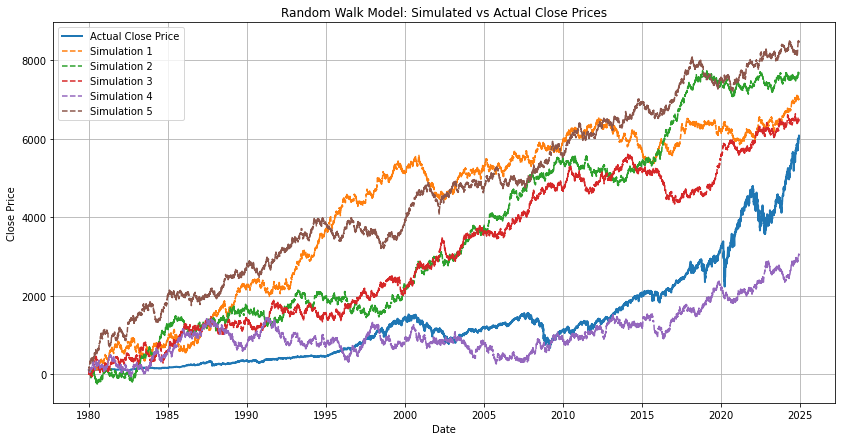

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Close Price', linewidth=2)
for i in range(n_simulations):
    plt.plot(data['Date'], simulated_paths[i, :], linestyle='--', label=f'Simulation {i+1}')
plt.title('Random Walk Model: Simulated vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

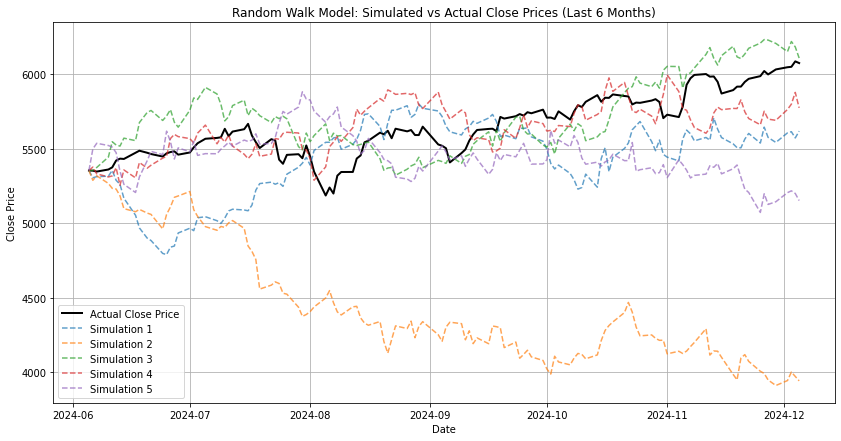

In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data['Close_diff'] = data['Close'].diff().dropna()

last_six_months = data[data['Date'] >= (data['Date'].max() - pd.DateOffset(months=6))]
drift = last_six_months['Close_diff'].diff().mean()
volatility = last_six_months['Close_diff'].diff().std()
n_simulations = 5
n_steps = len(last_six_months)

simulated_paths = np.zeros((n_simulations, n_steps))
simulated_paths[:, 0] = last_six_months['Close'].iloc[0]
for i in range(1, n_steps):
    simulated_paths[:, i] = simulated_paths[:, i - 1] + np.random.normal(drift, volatility, n_simulations)
    
plt.figure(figsize=(14, 7))
plt.plot(last_six_months['Date'], last_six_months['Close'], label='Actual Close Price', linewidth=2, color='black')
for i in range(n_simulations):
    plt.plot(last_six_months['Date'], simulated_paths[i, :], linestyle='--', alpha=0.7, label=f'Simulation {i+1}')
plt.title('Random Walk Model: Simulated vs Actual Close Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [171]:
#d
def log_likelihood(actual, simulated):
    residuals = actual - simulated
    variance = np.var(residuals)
    log_likelihood_value = -0.5 * np.sum((residuals ** 2) / variance + np.log(2 * np.pi * variance))
    return log_likelihood_value

log_likelihoods = [log_likelihood(last_six_months['Close'].values, simulated_paths[i, :]) for i in range(n_simulations)]
def mae(actual, simulated):
    return np.mean(np.abs(actual - simulated))

maes = [mae(last_six_months['Close'].values, simulated_paths[i, :]) for i in range(n_simulations)]
def rmse(actual, simulated):
    return np.sqrt(np.mean((actual - simulated) ** 2))

rmses = [rmse(last_six_months['Close'].values, simulated_paths[i, :]) for i in range(n_simulations)]
for i in range(n_simulations):
    print(f'Simulation {i+1}:')
    print(f'Log-Likelihood: {log_likelihoods[i]}')
    print(f'MAE: {maes[i]}')
    print(f'RMSE: {rmses[i]}')
    print('-----------------------')

Simulation 1:
Log-Likelihood: -903.5275613709456
MAE: 209.80543562728909
RMSE: 250.94847554365634
-----------------------
Simulation 2:
Log-Likelihood: -818.3704541251077
MAE: 119.89958382064592
RMSE: 143.28833409547622
-----------------------
Simulation 3:
Log-Likelihood: -887.6029220252353
MAE: 205.80083606830607
RMSE: 248.5002974145514
-----------------------
Simulation 4:
Log-Likelihood: -880.6786671544066
MAE: 191.2019938927228
RMSE: 235.1955706842737
-----------------------
Simulation 5:
Log-Likelihood: -985.3737643441702
MAE: 272.03881663501244
RMSE: 300.76723210162066
-----------------------


Question anwser:
Price Changes Are Independent: Each price change is independent of the previous one. This implies that past movements or trends cannot predict future movements.

Price Changes Are Normally Distributed: The returns (price changes) follow a normal distribution.

Constant Expected Returns: The expected return on an asset remains constant over time.

While the random walk model provides a simplified way to understand financial markets, it might be too simplistic for several reasons:

Market Anomalies: Financial markets often exhibit patterns or anomalies (e.g., momentum, mean reversion) that contradict the random walk assumption.

Volatility Clustering: Financial markets show periods of high and low volatility, which are not captured by the constant variance assumption in the random walk model.

Economic and Market Factors: Prices are influenced by economic indicators, interest rates, market sentiment, and other external factors that the random walk model does not account for.

Market Frictions and Imperfections: Transaction costs, market liquidity, and other frictions can influence price movements, making them not entirely random.

3333333333333333333333333333333333
a)

Geometric Brownian Motion (GBM) models are widely used in mathematical finance for modeling stock prices and other financial assets.

Basic Concept: GBM is a continuous-time stochastic process used to model stock prices. It assumes that the logarithm of the price follows a Brownian motion with drift.

Mathematical Formulation: The GBM model is defined by the stochastic differential equation: $$dS(t) = \mu S(t) dt + \sigma S(t) dW(t)$$ where 
𝑆
(
𝑡
)
 is the stock price at time 
𝑡
, 
𝜇
 is the drift rate, 
𝜎
 is the volatility, and 
𝑑
𝑊
(
𝑡
)
 is the increment of a Wiener process (Brownian motion).

Applications: GBM is commonly used in the Black-Scholes model for option pricing, as well as in various financial forecasting and risk management applications.

Assumptions and Limitations: While GBM is useful, it has limitations. It assumes constant volatility and drift, which may not hold in real markets. Additionally, it does not account for jumps or other market anomalies.

Extensions and Alternatives: Researchers have proposed extensions to GBM, such as incorporating stochastic volatility or jump-diffusion processes, to better capture market behaviors.

In [174]:
#(b)
from scipy.optimize import minimize
import torch
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
prices = data['Close']
prices_tensor = torch.tensor(prices.values, dtype=torch.float32)
log_returns = torch.log(prices_tensor[1:] / prices_tensor[:-1])
mu = log_returns.mean()
sigma = log_returns.std(unbiased=True)
trading_days = 252
mu_annualized = mu * trading_days
sigma_annualized = sigma * torch.sqrt(torch.tensor(trading_days))
print(f"Estimated μ (daily): {mu.item():.6f}")
print(f"Estimated σ (daily): {sigma.item():.6f}")
print(f"Estimated μ (annualized): {mu_annualized.item():.6f}")
print(f"Estimated σ (annualized): {sigma_annualized.item():.6f}")


Estimated μ (daily): 0.000358
Estimated σ (daily): 0.011291
Estimated μ (annualized): 0.090121
Estimated σ (annualized): 0.179243


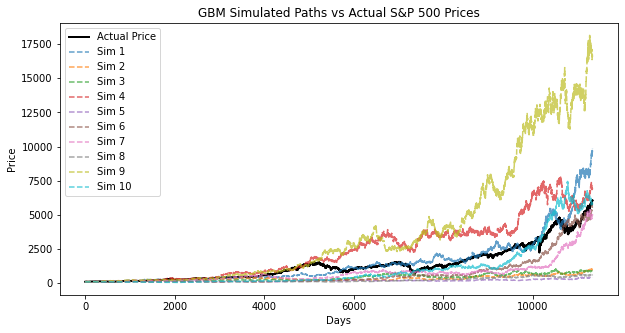

In [175]:
import torch
import matplotlib.pyplot as plt

num_simulations = 10 
num_days = len(prices) 
dt = 1.0 
S0 = prices.iloc[0] 

Z = torch.randn(num_simulations, num_days)

drift = (mu - 0.5 * sigma**2) * dt
diffusion = sigma * torch.sqrt(torch.tensor(dt)) * Z

S = torch.zeros(num_simulations, num_days)
S[:, 0] = S0 

for t in range(1, num_days):
    S[:, t] = S[:, t-1] * torch.exp(drift + diffusion[:, t])

plt.figure(figsize=(10, 5))
plt.plot(prices.values, label="Actual Price", color="black", linewidth=2)
for i in range(num_simulations):
    plt.plot(S[i].numpy(), linestyle="dashed", alpha=0.7)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("GBM Simulated Paths vs Actual S&P 500 Prices")
plt.legend(["Actual Price"] + [f"Sim {i+1}" for i in range(num_simulations)])
plt.show()


Estimated μ (daily): 0.000995
Estimated σ (daily): 0.008392
Estimated μ (annualized): 0.250711
Estimated σ (annualized): 0.133219


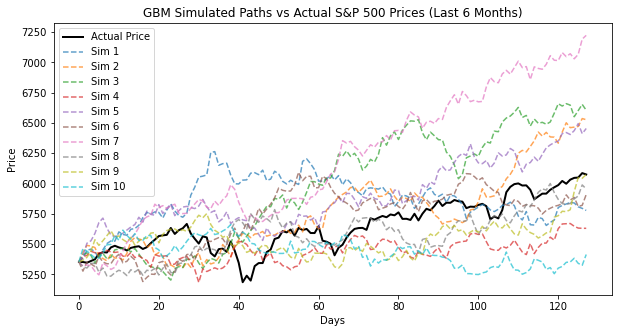

In [176]:
import pandas as pd
from scipy.optimize import minimize
import torch
import matplotlib.pyplot as plt

data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

last_six_months = data['Date'].max() - pd.DateOffset(months=6)
data_last_6_months = data[data['Date'] >= last_six_months].reset_index(drop=True)

prices = data_last_6_months['Close']
prices_tensor = torch.tensor(prices.values, dtype=torch.float32)
log_returns = torch.log(prices_tensor[1:] / prices_tensor[:-1])
mu = log_returns.mean()
sigma = log_returns.std(unbiased=True)
trading_days = 252
mu_annualized = mu * trading_days
sigma_annualized = sigma * torch.sqrt(torch.tensor(trading_days))
print(f"Estimated μ (daily): {mu.item():.6f}")
print(f"Estimated σ (daily): {sigma.item():.6f}")
print(f"Estimated μ (annualized): {mu_annualized.item():.6f}")
print(f"Estimated σ (annualized): {sigma_annualized.item():.6f}")

num_simulations = 10
num_days = len(prices)
dt = 1.0
S0 = prices.iloc[0]

Z = torch.randn(num_simulations, num_days)

drift = (mu - 0.5 * sigma**2) * dt
diffusion = sigma * torch.sqrt(torch.tensor(dt)) * Z

S = torch.zeros(num_simulations, num_days)
S[:, 0] = S0  

for t in range(1, num_days):
    S[:, t] = S[:, t-1] * torch.exp(drift + diffusion[:, t])

plt.figure(figsize=(10, 5))
plt.plot(prices.values, label="Actual Price", color="black", linewidth=2)
for i in range(num_simulations):
    plt.plot(S[i].numpy(), linestyle="dashed", alpha=0.7)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("GBM Simulated Paths vs Actual S&P 500 Prices (Last 6 Months)")
plt.legend(["Actual Price"] + [f"Sim {i+1}" for i in range(num_simulations)])
plt.show()


In [178]:
import torch.nn.functional as F

log_returns_actual = torch.log(torch.tensor(prices.values[1:], dtype=torch.float32) /
                               torch.tensor(prices.values[:-1], dtype=torch.float32))

log_likelihoods = []
mae_list = []
rmse_list = []

for i in range(num_simulations):
    log_returns_simulated = torch.log(S[i, 1:] / S[i, :-1])
    
    log_likelihood = -0.5 * torch.sum(torch.log(2 * torch.pi * sigma**2) + ((log_returns_simulated - mu) ** 2) / sigma**2)
    log_likelihoods.append(log_likelihood.item())
    
    mae = torch.mean(torch.abs(S_actual - S[i]))
    mae_list.append(mae.item())
    
    rmse = torch.sqrt(torch.mean((S_actual - S[i]) ** 2))
    rmse_list.append(rmse.item())

for i in range(num_simulations):
    print(f"Simulation {i+1}:")
    print(f"  Log-Likelihood: {log_likelihoods[i]:.6f}")
    print(f"  MAE: {mae_list[i]:.6f}")
    print(f"  RMSE: {rmse_list[i]:.6f}")
    print()  


Simulation 1:
  Log-Likelihood: 418.658295
  MAE: 286.749329
  RMSE: 367.286560

Simulation 2:
  Log-Likelihood: 425.033722
  MAE: 190.902954
  RMSE: 237.248123

Simulation 3:
  Log-Likelihood: 417.998657
  MAE: 394.679382
  RMSE: 458.150696

Simulation 4:
  Log-Likelihood: 435.329529
  MAE: 227.544586
  RMSE: 267.849579

Simulation 5:
  Log-Likelihood: 416.652954
  MAE: 246.358353
  RMSE: 273.726501

Simulation 6:
  Log-Likelihood: 421.599640
  MAE: 198.362717
  RMSE: 238.310715

Simulation 7:
  Log-Likelihood: 430.570068
  MAE: 563.301392
  RMSE: 658.932373

Simulation 8:
  Log-Likelihood: 425.846497
  MAE: 157.436615
  RMSE: 194.305832

Simulation 9:
  Log-Likelihood: 428.145538
  MAE: 173.271881
  RMSE: 203.865646

Simulation 10:
  Log-Likelihood: 431.887665
  MAE: 280.860535
  RMSE: 359.635620



3)(d)

How GBM Handles Price Trends and Volatility
Price Trends (Drift Term μμ)
The drift term in the GBM model represents the expected return of an asset over time.
It is estimated from historical log returns and determines the general direction of price movements.
A positive drift leads to an upward trend, while a negative drift indicates a downward trend.

Volatility (Diffusion Term σσ)
The volatility term (σσ) measures the standard deviation of log returns and captures the random fluctuations in prices.
It ensures that price movements incorporate uncertainty, making GBM a stochastic process.
Higher volatility leads to wider price fluctuations, while lower volatility results in smoother trends.

Limitations of GBM in Capturing Real-World Financial Data:

Constant Drift and Volatility Assumption
GBM assumes that μμ and σσ are constant over time, but in reality, market conditions change frequently due to economic events, central bank policies, and investor sentiment.
Real markets exhibit volatility clustering, where periods of high volatility are followed by more high volatility (e.g., in financial crises).

No Mean Reversion
GBM allows prices to drift indefinitely without a tendency to revert to a long-term mean.
Real stock prices often exhibit mean-reverting behavior (e.g., stock prices bouncing back after a sharp drop, which GBM cannot model).
Alternative models like Ornstein-Uhlenbeck Process or Heston Model incorporate mean reversion.

Lognormal Price Distribution
GBM assumes that stock prices follow a lognormal distribution, meaning that returns are normally distributed.
However, empirical data shows fat tails (extreme price jumps), meaning that large crashes and rallies are more frequent than GBM predicts (Black Swan events).
Jump-diffusion models (e.g., Merton’s Model) and stochastic volatility models (e.g., Heston Model) handle this better.

Ignores Market Microstructure Effects
GBM does not account for liquidity, bid-ask spreads, and market frictions, which affect real trading.
In reality, market orders, transaction costs, and order book dynamics influence price movements in ways GBM cannot capture.

No Memory (Markov Property)
GBM is a Markov process, meaning the next price depends only on the current price, not on past prices.
However, in real markets, momentum effects exist where past trends influence future movements (e.g., technical analysis strategies rely on this).


Best for:Basic financial modeling & pricing derivatives (e.g., Black-Scholes model for options).
Simulating long-term price behavior in the absence of large jumps or regime changes.

Not ideal for:Modeling high-frequency trading or capturing short-term market dynamics.
Situations with extreme events, structural breaks, or fat-tailed distributions.

If more realistic modeling is needed, consider stochastic volatility models (e.g., Heston) or jump-diffusion models (e.g., Merton’s model).

4)(a)

(a) Literature Review on GPR in Finance & Standard Kernels
GPR Overview

GPR is a Bayesian non-parametric model that assumes stock prices follow a multivariate normal distribution.
It is useful for time-series forecasting and estimating uncertainty (confidence intervals).
Unlike GBM, GPR does not assume a specific functional form for prices, making it more flexible.

Standard Kernels in GPR

GPR models rely on kernel functions, which define similarity between data points. Common choices include:

Radial Basis Function (RBF) Kernel (Squared Exponential):
k(xi,xj)=exp⁡(−∥xi−xj∥22l2)
k(xi​,xj​)=exp(−2l2∥xi​−xj​∥2​)
Captures smooth trends but struggles with sudden jumps.

Matérn Kernel:
More robust for noisy financial data than RBF.

Periodic Kernel:
Useful for seasonal trends (e.g., economic cycles).

Linear Kernel:
Useful for modeling linear price trends.

In [138]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("SP500.csv")
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data["Log_Returns"] = np.log(data["Close"] / data["Close"].shift(1))
data["Price_Range"] = data["High"] - data["Low"]
data["Moving_Avg_10"] = data["Close"].rolling(window=10).mean()
data["Momentum_10"] = data["Close"] - data["Close"].shift(10)
data["Volatility_10"] = data["Close"].rolling(window=10).std()  
data["EMA_10"] = data["Close"].ewm(span=10, adjust=False).mean()  
data['Close_Diff'] = data['Close'].diff()
data = data.dropna()  

features = data[["Price_Range", "Volume", "Log_Returns", "Moving_Avg_10", "Momentum_10", "Volatility_10", "EMA_10"]].dropna().values
target = data["Close_Diff"].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1)).flatten()

X_train = X_scaled[:-160] 
X_test  = X_scaled[-160:] 
y_train = y_scaled[:-160] 
y_test  = y_scaled[-160:] 
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class GPRModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = (
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) +  
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())  
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPRModel(X_train, y_train, likelihood)

model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

epochs = 180
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = -mll(output, y_train)
    loss.backward()
    optimizer.step()
    if i % 20 == 0:
        print(f"Epoch {i}, Loss: {loss.item():.6f}")


Epoch 0, Loss: 0.876191
Epoch 20, Loss: 0.793819
Epoch 40, Loss: 0.706836
Epoch 60, Loss: 0.615711
Epoch 80, Loss: 0.521637
Epoch 100, Loss: 0.422327
Epoch 120, Loss: 0.322578
Epoch 140, Loss: 0.220053
Epoch 160, Loss: 0.114652


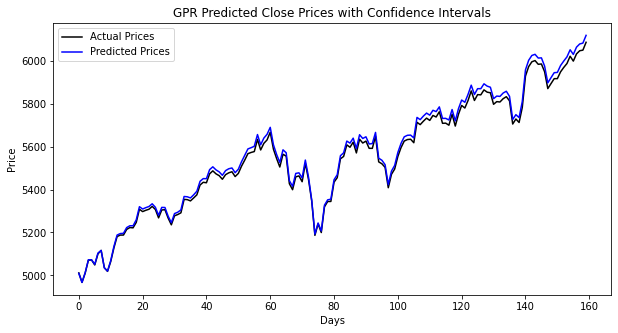

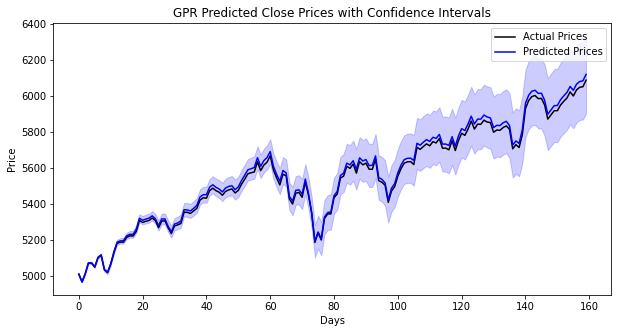

MAE: 18.42, RMSE: 20.11
Percentage within confidence intervals: 99.38%


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_preds = likelihood(model(X_test))
    mean = test_preds.mean
    lower, upper = test_preds.confidence_region()

mean_diff_actual = mean.numpy().reshape(-1, 1)
lower_diff_actual = lower.numpy().reshape(-1, 1)
upper_diff_actual = upper.numpy().reshape(-1, 1)
y_test_diff_actual = y_test.numpy().reshape(-1, 1)

y_test_close_actual = data["Close"].iloc[-len(y_test_diff_actual) - 1:-1].values 
mean_close_actual = data["Close"].iloc[-len(mean_diff_actual) - 1:-1].values + np.cumsum(mean_diff_actual)
lower_close_actual = data["Close"].iloc[-len(lower_diff_actual) - 1:-1].values + np.cumsum(lower_diff_actual)
upper_close_actual = data["Close"].iloc[-len(upper_diff_actual) - 1:-1].values + np.cumsum(upper_diff_actual)

plt.figure(figsize=(10, 5))
plt.plot(y_test_close_actual[-160:], label="Actual Prices", color="black")
plt.plot(mean_close_actual, label="Predicted Prices", color="blue")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("GPR Predicted Close Prices with Confidence Intervals")
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(y_test_close_actual[-160:], label="Actual Prices", color="black")
plt.plot(mean_close_actual, label="Predicted Prices", color="blue")
plt.fill_between(range(len(mean_close_actual)), lower_close_actual, upper_close_actual, color="blue", alpha=0.2)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("GPR Predicted Close Prices with Confidence Intervals")
plt.legend()
plt.show()
mae = mean_absolute_error(y_test_close_actual[-160:], mean_close_actual)
rmse = np.sqrt(mean_squared_error(y_test_close_actual[-160:], mean_close_actual))

within_confidence_interval = np.mean((y_test_close_actual[-160:] >= lower_close_actual) & (y_test_close_actual[-160:] <= upper_close_actual)) * 100

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
print(f"Percentage within confidence intervals: {within_confidence_interval:.2f}%")


4)Question

In [141]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("SP500.csv")
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data["Log_Returns"] = np.log(data["Close"] / data["Close"].shift(1))
data["Price_Range"] = data["High"] - data["Low"]
data["Moving_Avg_10"] = data["Close"].rolling(window=10).mean()
data["Momentum_10"] = data["Close"] - data["Close"].shift(10)
data["Volatility_10"] = data["Close"].rolling(window=10).std()  
data["EMA_10"] = data["Close"].ewm(span=10, adjust=False).mean() 
data['Close_Diff'] = data['Close'].diff()
data = data.dropna()  

features = data[["Price_Range", "Volume", "Log_Returns", "Moving_Avg_10", "Momentum_10", "Volatility_10", "EMA_10"]].dropna().values
target = data["Close_Diff"].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1)).flatten()

X_train = X_scaled[:-160] 
X_test  = X_scaled[-160:] 
y_train = y_scaled[:-160] 
y_test  = y_scaled[-160:] 
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class GPRModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = (
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) +  
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())  
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPRModel(X_train, y_train, likelihood)

model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

epochs = 200
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = -mll(output, y_train)
    loss.backward()
    optimizer.step()
    if i % 20 == 0:
        print(f"Epoch {i}, Loss: {loss.item():.6f}")



Epoch 0, Loss: 0.877970
Epoch 20, Loss: 0.792284
Epoch 40, Loss: 0.709817
Epoch 60, Loss: 0.615299
Epoch 80, Loss: 0.520950
Epoch 100, Loss: 0.421990
Epoch 120, Loss: 0.323305
Epoch 140, Loss: 0.218387
Epoch 160, Loss: 0.114113
Epoch 180, Loss: 0.008994


C:\Users\Mohammad Zeinalpour\AppData\Local\Programs\Python\Python310\lib\site-packages\gpytorch\models\exact_gp.py:296: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Training RMSE: 0.035841
Test RMSE: 0.584004


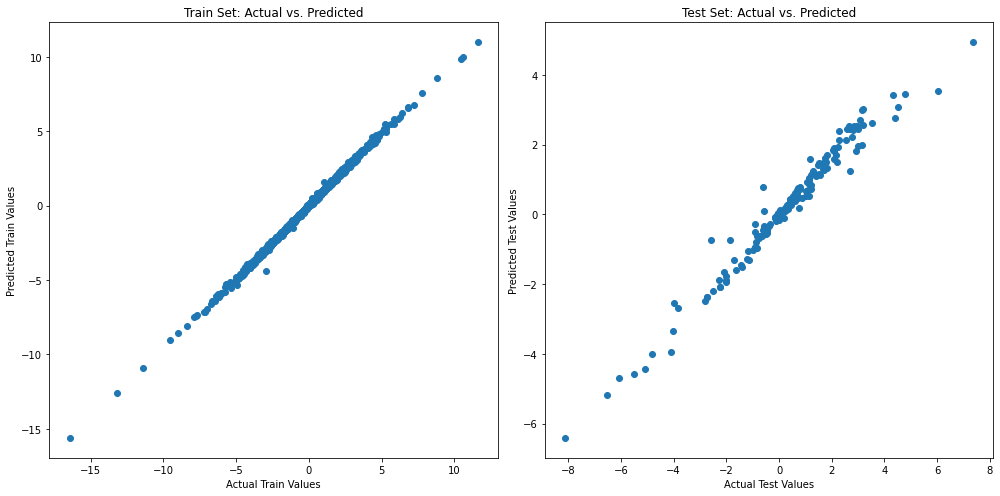

In [147]:
model.eval()
likelihood.eval()

with torch.no_grad():
    train_preds = likelihood(model(X_train)).mean
    train_loss = torch.mean((train_preds - y_train) ** 2).item()
    print(f'Training RMSE: {np.sqrt(train_loss):.6f}')

    test_preds = likelihood(model(X_test)).mean
    test_loss = torch.mean((test_preds - y_test) ** 2).item()
    print(f'Test RMSE: {np.sqrt(test_loss):.6f}')
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_preds)
plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Train Set: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_preds)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.title('Test Set: Actual vs. Predicted')

plt.tight_layout()
plt.show()


The GPR model could indeed be overfitted. This conclusion is based on the performance discrepancy between the training and test data. The training RMSE is significantly lower (0.035841) compared to the test RMSE (0.584004). The scatter plot for the training set shows a nearly perfect alignment along the diagonal, indicating that the model predicts the training data very accurately. However, the scatter plot for the test set shows more dispersion and deviation from the diagonal, indicating that the model's predictions are less accurate on the test data. This large difference in performance suggests that the model may have learned the training data too well, capturing noise and specific patterns that do not generalize to new, unseen data.

555555555555555555555555555555555555555555
a)Review literature on Hidden Markov Models (HMMs) applied to financial time series.
Discuss how hidden states have been interpreted as market regimes.

Hidden Markov Models (HMMs) have been widely used in financial modeling due to their ability to model unobserved market regimes (or "hidden states") that influence observable financial time series such as stock prices, returns, or volatility. The core strength of HMMs lies in their ability to capture regime-switching behavior, which is often evident in financial markets, where different states correspond to distinct market conditions.
HMMs are a type of statistical model where the system being modeled is assumed to be a Markov process with unobservable states. The model consists of two main components:
Hidden states: The unobserved market regimes or conditions (e.g., high volatility vs. low volatility, bull vs. bear market).
Observations: The observed financial data (e.g., returns, prices, volatility).

The HMM assumes that:
The system evolves over time with a transition probability between states.
Each state generates observable outcomes according to a probabilistic distribution (often Gaussian, but can be more complex like Gaussian Mixture Models - GMMs).
Regime Detection and Switching Models: HMMs are ideal for modeling market regime shifts. For example, stock returns might follow a different distribution during a bull market (e.g., high returns and low volatility) than in a bear market (e.g., negative returns and high volatility).

Volatility Modeling: Volatility can switch between low and high levels in different market regimes, and HMMs can help detect when volatility changes, which is critical for option pricing and risk management.

Asset Pricing and Portfolio Management: HMMs have been used to model the underlying regimes that influence asset prices. Investors can use the model to make decisions based on whether the market is in a risk-on (bull market) or risk-off (bear market) state.

Credit Risk and Default Prediction: HMMs are applied in predicting default risks for financial institutions, where the hidden states represent different economic conditions (e.g., recession, recovery).

Market Forecasting: Using HMMs, researchers have developed methods to forecast returns, volatility, or other financial metrics by incorporating regime shifts.

Hidden States as Market Regimes:

In financial applications, the hidden states of an HMM are typically interpreted as market regimes or economic states that capture different market conditions or phases. Several studies have proposed different regimes based on observed market behaviors. Below are common interpretations:

Bull Market: Characterized by a strong uptrend in asset prices, typically with low volatility. This state reflects periods of economic expansion or investor optimism. Returns are usually positive with low variance.

Bear Market: Characterized by declining asset prices, typically with high volatility. This state represents periods of economic contraction or investor pessimism. Returns are negative with high variance.

Sideways or Stable Market: This state represents a market in which asset prices are stable or move within a narrow range, often with low volatility. It could indicate economic stagnation or equilibrium, with returns clustering around zero.

Volatile Market: Often associated with market crises or uncertain periods. High volatility with uncertain or mixed returns. It might correspond to situations like the 2008 financial crisis or COVID-19 market reactions, where returns are highly unpredictable, and volatility spikes.

Modeling Market Regimes with HMMs:
HMMs can classify financial data into different hidden states (regimes) by observing historical data. Key points in the regime modeling process include:

Transition Probabilities: These represent the likelihood of switching between different regimes (e.g., from bull to bear market). Estimating these probabilities helps in understanding the likelihood of regime shifts over time.

Emission Probabilities: Each hidden state generates observable data with a certain probability distribution. Typically, returns are modeled using normal (Gaussian) distributions within each state, but more complex models like Gaussian Mixture Models (GMMs) can be used when returns are multimodal.

In [242]:
import warnings
import time
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

warnings.filterwarnings("ignore", category=DeprecationWarning)

PLOT_SHOW = True
PLOT_TYPE = False

NUM_TEST = 160
K = 50
NUM_ITERS = 10000
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
#data['Close_diff'] = data['Close'].diff().dropna()
data = data.drop(['Date', 'Adj Close', 'Volume', 'Open', 'High', 'Low'], axis=1)
data = data.dropna()
data = data.values
dataset = data.astype('float64')
likelihood_vect = np.empty([0, 1])
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])
predicted_stock_data = np.empty([0, dataset.shape[1]])
states_sequence = np.empty([0])
states = 3
for idx in reversed(range(NUM_TEST)):
    train_dataset = dataset[idx + 1:]
    test_data = dataset[idx]
    num_examples = train_dataset.shape[0]
    if idx == NUM_TEST - 1:
        model = hmm.GMMHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='stmc')
    else:
        model = hmm.GMMHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='')
        model.transmat_ = transmat_retune_prior 
        model.startprob_ = startprob_retune_prior
        model.means_ = means_retune_prior
        model.covars_ = covars_retune_prior

    model.fit(np.flipud(train_dataset))

    transmat_retune_prior = model.transmat_
    startprob_retune_prior = model.startprob_
    means_retune_prior = model.means_
    covars_retune_prior = model.covars_

    iters = 1
    past_likelihood = []
    curr_likelihood = model.score(np.flipud(train_dataset[0:K - 1, :]))
    while iters < num_examples / K - 1:
        past_likelihood = np.append(past_likelihood, model.score(np.flipud(train_dataset[iters:iters + K - 1, :])))
        iters += 1
    likelihood_diff_idx = np.argmin(np.absolute(past_likelihood - curr_likelihood))
    predicted_change = train_dataset[likelihood_diff_idx, :] - train_dataset[likelihood_diff_idx + 1, :]
    predicted_stock_data = np.vstack((predicted_stock_data, dataset[idx + 1, :] + predicted_change))


In [243]:
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
initial_close_price = data['Close'].iloc[0]
predicted_stock_close = predicted_stock_diff

mape = calc_mape(predicted_stock_close, data['Close'].iloc[:NUM_TEST].values.reshape(-1, 1))
print('MAPE is', mape)
print("Transition Matrix (transmat_):")
print(transmat_retune_prior)

print("Starting Probabilities (startprob_):")
print(startprob_retune_prior)

print("Means (means_):")
print(means_retune_prior)

print("Covariances (covars_):")
print(covars_retune_prior)


MAPE is [0.06021565]
Transition Matrix (transmat_):
[[9.99653212e-01 7.52206185e-06 3.39265465e-04]
 [0.00000000e+00 1.87181052e-02 9.81281895e-01]
 [0.00000000e+00 2.69074882e-01 7.30925118e-01]]
Starting Probabilities (startprob_):
[1. 0. 0.]
Means (means_):
[[[3140.7108052 ]]

 [[ 743.26997739]]

 [[ 743.52837035]]]
Covariances (covars_):
[[[[1238582.37280787]]]


 [[[ 228615.3911873 ]]]


 [[[ 228697.8683647 ]]]]


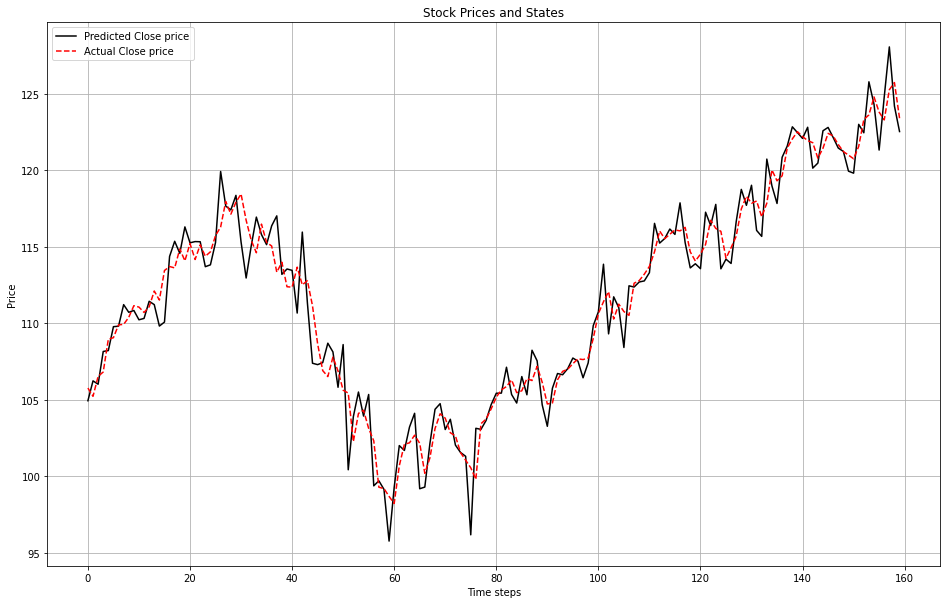

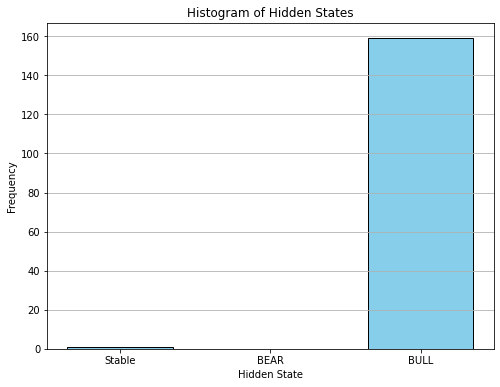

In [244]:

plt.figure(figsize=(16,10))
plt.plot(range(NUM_TEST),  np.flipud(predicted_stock_data[:, 0]), 'k-', label='Predicted Close price')
plt.plot(range(NUM_TEST), dataset[range(NUM_TEST), 0], 'r--', label='Actual Close price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('Stock Prices and States')
plt.grid(True)
plt.legend(loc='upper left')
hidden_states = model.predict(dataset[range(NUM_TEST)].reshape(-1,1))
plt.figure(figsize=(8, 6))
bins = np.arange(model.n_components + 1) - 0.5
plt.hist(hidden_states, bins=bins, align='mid', rwidth=0.7, color='skyblue', edgecolor='black')
plt.xticks(range(model.n_components), labels=["Stable" , "BEAR" , "BULL"])
plt.title('Histogram of Hidden States')
plt.xlabel('Hidden State')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [239]:
#check if model overfit
import warnings
import time
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

warnings.filterwarnings("ignore", category=DeprecationWarning)

PLOT_SHOW = True
PLOT_TYPE = False

NUM_TEST = 160
K = 50
NUM_ITERS = 100000
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
#data['Close_diff'] = data['Close'].diff().dropna()
data = data.drop(['Date', 'Adj Close', 'Volume', 'Open', 'High', 'Low'], axis=1)
data = data.dropna()
data = data.values
dataset = data.astype('float64')
likelihood_vect = np.empty([0, 1])
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])
predicted_stock_data = np.empty([0, dataset.shape[1]])
states_sequence = np.empty([0])
states = 20
for idx in reversed(range(NUM_TEST)):
    train_dataset = dataset[idx + 1:]
    test_data = dataset[idx]
    num_examples = train_dataset.shape[0]
    if idx == NUM_TEST - 1:
        model = hmm.GMMHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='stmc')
    else:
        model = hmm.GMMHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='')
        model.transmat_ = transmat_retune_prior 
        model.startprob_ = startprob_retune_prior
        model.means_ = means_retune_prior
        model.covars_ = covars_retune_prior

    model.fit(np.flipud(train_dataset))

    transmat_retune_prior = model.transmat_
    startprob_retune_prior = model.startprob_
    means_retune_prior = model.means_
    covars_retune_prior = model.covars_

    iters = 1
    past_likelihood = []
    curr_likelihood = model.score(np.flipud(train_dataset[0:K - 1, :]))
    while iters < num_examples / K - 1:
        past_likelihood = np.append(past_likelihood, model.score(np.flipud(train_dataset[iters:iters + K - 1, :])))
        iters += 1
    likelihood_diff_idx = np.argmin(np.absolute(past_likelihood - curr_likelihood))
    predicted_change = train_dataset[likelihood_diff_idx, :] - train_dataset[likelihood_diff_idx + 1, :]
    predicted_stock_data = np.vstack((predicted_stock_data, dataset[idx + 1, :] + predicted_change))

mape = calc_mape(predicted_stock_data, np.flipud(dataset[range(NUM_TEST), :]))
print('MAPE is', mape)



MAPE is [0.01060504]


### Interpretation of Hidden States in HMM

 stock prices. Here's what the hidden states might reveal about market dynamics:

1. **Bull Market**:
    - Characterized by rising stock prices.
    - Indicates investor optimism, increasing demand, and economic growth.
    - You might notice higher means and lower variances in the Close prices for this state.

2. **Bear Market**:
    - Characterized by falling stock prices.
    - Reflects investor pessimism, decreasing demand, and economic slowdown.
    - You might notice lower means and higher variances in the Close prices for this state.

3. **Stable Market **:
    - Characterized by minimal movement in stock prices.
    - Indicates market indecision or consolidation phases.
    - You might notice means that are close to the overall market average and low variances in the Close prices for this state.

Each hidden state encapsulates a specific market condition that drives the observable price movements. Transition probabilities between these states can provide insights into the likelihood of switching from one market regime to another.

### Risk of Over-fitting in HMM Model
In the provided model:
- **Model Complexity**: The use of 3 hidden states is a balanced approach to capture distinct market regimes without excessive complexity.
- **Performance Metrics**: If the MAE and RMSE on the test data are reasonably low, it indicates the model generalizes well. However, if these metrics are significantly higher than on the training data, it suggests overfitting.

I increase Complexity of model with more iteration and more hidden state as scale as computional cost let me. 
the before MAPE was [0.06021565] but after increasing complexity MAPE is [0.01060504] which state that my model not overfitted

In [ ]:
666666666666666666666666666666666666666666666666666666

In [246]:
data = pd.read_csv('SP500.csv')
data = data.iloc[2:].reset_index(drop=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data['Close_diff'] = data['Close'].diff()
data = data.dropna()
print(data)

            Date         Open         High          Low        Close  \
1     1980-01-03     0.000000   106.080002   103.260002   105.220001   
2     1980-01-04     0.000000   107.080002   105.089996   106.519997   
3     1980-01-07     0.000000   107.800003   105.800003   106.809998   
4     1980-01-08     0.000000   109.290001   106.290001   108.949997   
5     1980-01-09     0.000000   111.089996   108.410004   109.050003   
...          ...          ...          ...          ...          ...   
11323 2024-11-29  6003.979980  6044.169922  6003.979980  6032.379883   
11324 2024-12-02  6040.109863  6053.580078  6035.330078  6047.149902   
11325 2024-12-03  6042.970215  6052.069824  6033.390137  6049.879883   
11326 2024-12-04  6069.390137  6089.839844  6061.060059  6086.490234   
11327 2024-12-05  6089.029785  6094.549805  6072.899902  6075.109863   

         Adj Close      Volume  Close_diff  
1       105.220001    50480000   -0.540001  
2       106.519997    39130000    1.299995  


(a) Review Literature on HMM-Based Trading Strategies and Regime-Switching Models
Common Approaches:

Stock Trend Prediction: HMMs are used to predict stock trends by identifying hidden states such as "bull market," "bear market," and "stable market". These states help in making trading decisions based on the predicted market conditions.

Market States Prediction: HMMs are applied to predict market states, which can be used to develop trading strategies that adapt to different market conditions.

Regime-Switching Models: These models capture cyclical patterns in financial markets by associating observed data with latent regimes modeled by a Markov chain. They are used for portfolio selection and demand estimation.

In [252]:
class StrategyManager():

    def __init__(self):
        self.df = self._data()
        self.sharpe = 0

    def _data(self):
        data = pd.read_csv('SP500.csv')
        data = data.iloc[2:].reset_index(drop=True)
        data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        data['Date'] = pd.to_datetime(data['Date'])
        numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
        data = self._structure_df(data)
        return data

    def _structure_df(self, df):
        df["Returns"] = df["Close"].pct_change()
        df["Range"] = df["High"] / df["Low"] - 1
        df["Bench_C_Rets"], sharpe = self._calculate_returns(df, True)
        self.sharpe = sharpe
        df.dropna(inplace=True)
        return df

    def _set_multiplier(self, direction):
        if direction == "long":
            pos_multiplier = 1
            neg_multiplier = 0
        elif direction == "long_short":
            pos_multiplier = 1
            neg_multiplier = -1
        else:
            pos_multiplier = 0
            neg_multiplier = -1
        return pos_multiplier, neg_multiplier

    def _calculate_returns(self, df, is_benchmark):
        
        if not is_benchmark:
            multiplier_1 = df["Signal"].shift(1)
            multiplier_2 = 1 if "PSignal" not in df.columns else df["PSignal"].shift(1)
            
            log_rets = np.log(df["Open"].shift(-1) / df["Open"]) * multiplier_1 * multiplier_2
        else:            
            log_rets = np.log(df["Close"] / df["Close"].shift(1))
        
        sharpe_ratio = self.sharpe_ratio(log_rets)
        
        c_log_rets = log_rets.cumsum()
        c_log_rets_exp = np.exp(c_log_rets) - 1
        
        return c_log_rets_exp, sharpe_ratio
    
    def sharpe_ratio(self, return_series):
        N = 255 
        rf = 0.005
        mean = return_series.mean() * N -rf
        sigma = return_series.std() * np.sqrt(N)
        sharpe = round(mean / sigma, 3)
        return sharpe

    def change_df(self, new_df, drop_cols=[]):
        new_df = new_df.drop(columns=drop_cols)
        self.df = new_df

    def backtest_ma_crossover(self, period_1, period_2, direction, drop_cols=[]):
        
        df = self.df
        pos_multiplier, neg_multiplier = self._set_multiplier(direction)
        if f"MA_{period_1}" or f"MA_{period_2}" not in df.columns:
            df[f"MA_{period_1}"] = df["Close"].rolling(window=period_1).mean()
            df[f"MA_{period_2}"] = df["Close"].rolling(window=period_2).mean()
            df.dropna(inplace=True)
        
        df["Bench_C_Rets"], sharpe_ratio_bench = self._calculate_returns(df, True)
        
        df.loc[df[f"MA_{period_1}"] > df[f"MA_{period_2}"], "Signal"] = pos_multiplier
        df.loc[df[f"MA_{period_1}"] <= df[f"MA_{period_2}"], "Signal"] = neg_multiplier
        
        df["Strat_C_Rets"], sharpe_ratio_strat = self._calculate_returns(df, False)
        
        bench_rets = df["Bench_C_Rets"].values.astype(float)
        strat_rets = df["Strat_C_Rets"].values.astype(float)
        print("Sense check: ", round(df["Close"].values[-1] / df["Close"].values[0] - 1, 3), round(bench_rets[-1], 3))
        
        if len(drop_cols) > 0:
            df = df.drop(columns=drop_cols)
        
        df = df.dropna()
        self.df = df
        
        return df, sharpe_ratio_bench, sharpe_ratio_strat

Sense check:  52.431 52.431
Correct Number of rows:  True


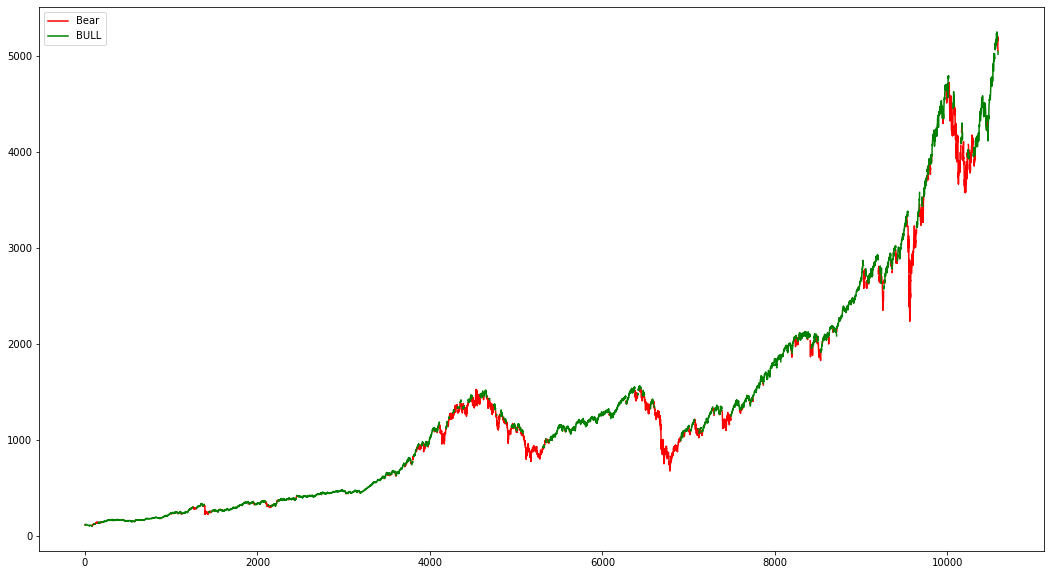

States:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length of States:  160
Sense check:  0.149 0.149
Sharpe Ratio Benchmark:  1.909
Sharpe Ratio Regime Strategy with MA Cross:  0.605
--- ---
Returns Benchmark: 14.21%
Returns Regime Strategy with MA Cross: 3.17%


C:\Users\Mohammad Zeinalpour\AppData\Local\Temp\ipykernel_12596\3462598503.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strat_mgr_test["PSignal"] = state_signals


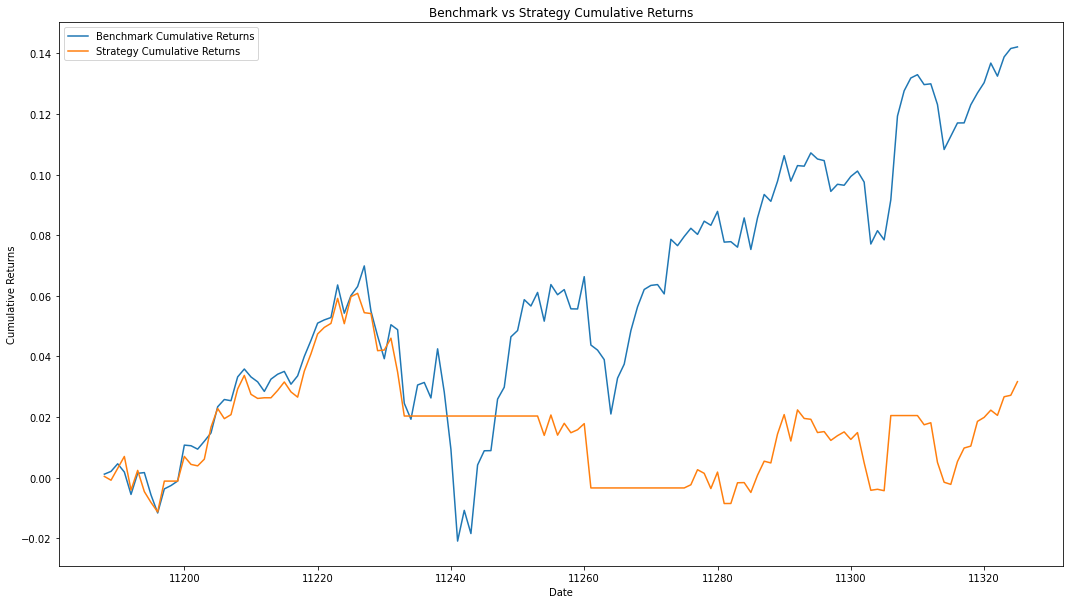

In [272]:
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
strat_mgr = StrategyManager()
df_strat_mgr = strat_mgr.df
data, sharpe_b, sharpe_s = strat_mgr.backtest_ma_crossover(14, 16, "long_short", drop_cols=["High", "Low", "Volume"])
X_train_2 = data[["Returns", "Range"]].iloc[:-160] 
X_test = data[["Returns", "Range"]].iloc[-160:]

hmm_model = GMMHMM(n_components=2, n_mix=2, covariance_type="full", n_iter=100).fit(X_train_2)
hidden_states = hmm_model.predict(X_train_2)

logprob, decoded_states = hmm_model.decode(X_train_2, algorithm="viterbi")
hidden_states_preds = hmm_model.predict(X_test.values)
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = data["Close"].iloc[:-160].values.astype(float)
print("Correct Number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1
fig = plt.figure(figsize = (18,10))
plt.plot(labels_0, color="red" , label="Bear")
plt.plot(labels_1, color="green" , label = "BULL")
plt.legend()
plt.show()
favourable_states = [1]
state_signals = []
for s in hidden_states_preds:
    if s in favourable_states:
        state_signals.append(1)
    else:
        state_signals.append(0)
print("States: ", state_signals[:10])
print("Length of States: ", len(state_signals))
df_strat_mgr_test = data.tail(len(X_test))
df_strat_mgr_test["PSignal"] = state_signals
strat_mgr.change_df(df_strat_mgr_test)
strat_mgr.df.head()
strat_df_2, sharpe_b_2, sharpe_s_2 = strat_mgr.backtest_ma_crossover(12, 21, "long")
strat_df_2
print("Sharpe Ratio Benchmark: ", sharpe_b_2)
print("Sharpe Ratio Regime Strategy with MA Cross: ", sharpe_s_2)
print("--- ---")
print(f"Returns Benchmark: {round(strat_df_2['Bench_C_Rets'].values[-1] * 100, 2)}%")
print(f"Returns Regime Strategy with MA Cross: {round(strat_df_2['Strat_C_Rets'].values[-1] * 100, 2)}%")
fig = plt.figure(figsize=(18, 10))
plt.plot(strat_df_2["Bench_C_Rets"], label="Benchmark Cumulative Returns")
plt.plot(strat_df_2["Strat_C_Rets"], label="Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Benchmark vs Strategy Cumulative Returns")
plt.legend()
plt.show()


In [273]:
print("Most Likely Sequence of States: ", decoded_states)

Most Likely Sequence of States:  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 